# k means clustering of Granite.jpg

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
image = cv2.imread('Granite.jpg')

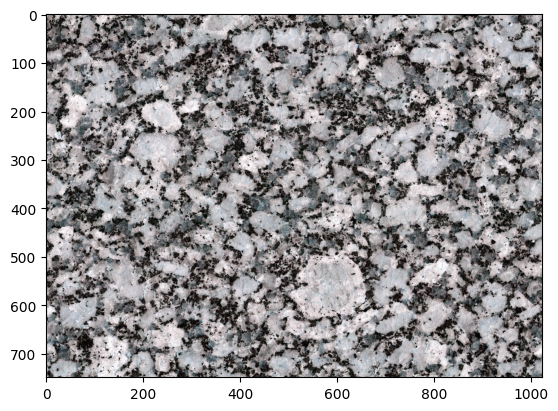

In [3]:
plt.imshow(image)

In [4]:
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

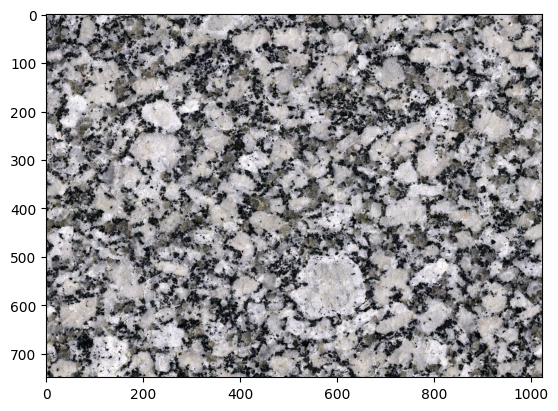

In [5]:
plt.imshow(rgb_img)

In [6]:
print(image.shape)

(749, 1024, 3)


In [7]:
pixel = rgb_img.reshape(-1, 3)

In [8]:
pixel.shape

(766976, 3)

In [9]:
no_cluster = 5
kmeans = KMeans(n_clusters = no_cluster, random_state = 42)

In [10]:
kmeans.fit(pixel)

C:\Users\ujjwol\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [11]:
label = kmeans.labels_

In [12]:
clus_centroid = kmeans.cluster_centers_
clus_centroid = clus_centroid.astype(int)

In [13]:
np.rint(clus_centroid)
#Greenish
#Dark Blue
#Greyish

array([[ 81.,  81.,  81.],
       [176., 173., 177.],
       [ 22.,  23.,  25.],
       [213., 209., 213.],
       [131., 130., 132.]])

In [14]:
segmented_image = np.zeros_like(pixel)

In [15]:
clustered_image = clus_centroid[label].astype(np.uint8).reshape(image.shape)
plt.subplot(1,2,1)
plt.imshow(clustered_image)
plt.title('Segmented')
plt.subplot(1,2,2)
plt.imshow(rgb_img)

In [16]:
# Calculate the number of pixels in each cluster
cluster_sizes = np.bincount(label, minlength=no_cluster)

# Calculate the total number of pixels in the image
total_pixels = label.size

# Calculate the percentage of pixels in each cluster
percentage_pixels = (cluster_sizes / total_pixels) * 100

# Display the percentage of pixels in each cluster
for i, percentage in enumerate(percentage_pixels):
    print(f"Cluster {i}: {percentage:.2f}%")

Cluster 0: 14.95%
Cluster 1: 28.18%
Cluster 2: 15.13%
Cluster 3: 22.95%
Cluster 4: 18.80%


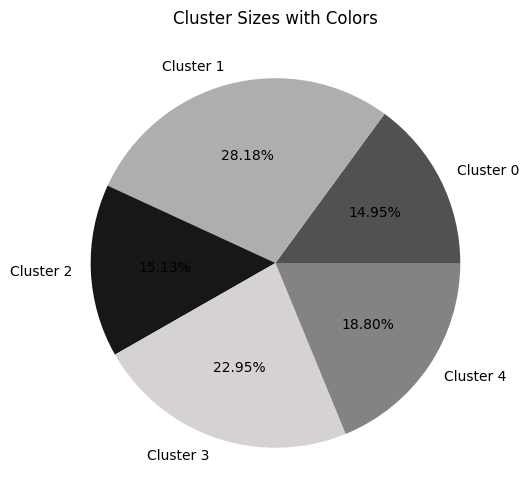

In [17]:
# Visualize cluster sizes in a pie chart with assigned colors
plt.figure(figsize=(6, 6))
plt.pie(percentage_pixels, labels=[f"Cluster {i}" for i in range(no_cluster)],
        autopct='%.2f%%', startangle=0, colors=clus_centroid / 255)
plt.title('Cluster Sizes with Colors')
plt.show()

In [18]:
# Create a DataFrame to store cluster information
cluster_data = {
    'Cluster': range(no_cluster),
    'Pixel Count': cluster_sizes,
    'Red': clus_centroid[:, 0],
    'Green': clus_centroid[:, 1],
    'Blue': clus_centroid[:, 2]
}

cluster_df = pd.DataFrame(cluster_data)

# Set the index of the DataFrame to the cluster indices
cluster_df.set_index('Cluster', inplace=True)

cluster_df

,Pixel Count,Red,Green,Blue
Cluster,,,,
0,114654,81,81,81
1,216106,176,173,177
2,116065,22,23,25
3,175996,213,209,213
4,144155,131,130,132


In [19]:
cluster1_pix = cluster_df.iloc[1]['Pixel Count']
cluster1_pix

216106

In [20]:
total_pix = cluster_df.sum()['Pixel Count']
total_pix

766976

In [21]:
wcss = []
for k in range(2, 15):
    kmeansclus = KMeans(n_clusters = k, n_init=10, random_state= 42)
    kmeansclus.fit(pixel)
    wcss.append(kmeansclus.inertia_)

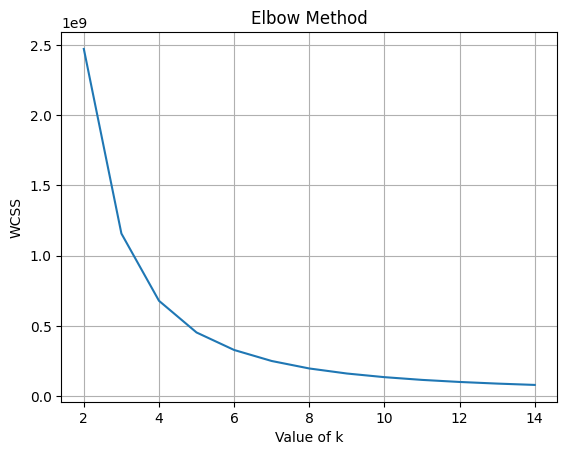

In [22]:
plt.plot(range(2, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Value of k')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()